In [ ]:
#Koneksi ke google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Masuk kedalam direktori penyimpanan dataset
%cd /gdrive
%cd My Drive
%cd dataset

/gdrive
/gdrive/My Drive
/gdrive/My Drive/dataset


In [ ]:
#Meng-unzip dataset atau mengekstrak
!unzip datatumor.zip

Archive:  datatumor.zip
   creating: test/
   creating: test/BRAINTUMOR/
  inflating: test/BRAINTUMOR/(1223).jpg  
  inflating: test/BRAINTUMOR/(1224).jpg  
  inflating: test/BRAINTUMOR/(1225).jpg  
  inflating: test/BRAINTUMOR/(1226).jpg  
  inflating: test/BRAINTUMOR/(1227).jpg  
  inflating: test/BRAINTUMOR/(1228).jpg  
  inflating: test/BRAINTUMOR/(1229).jpg  
  inflating: test/BRAINTUMOR/(1230).jpg  
  inflating: test/BRAINTUMOR/(1231).jpg  
  inflating: test/BRAINTUMOR/(1232).jpg  
  inflating: test/BRAINTUMOR/(1233).jpg  
  inflating: test/BRAINTUMOR/(1234).jpg  
  inflating: test/BRAINTUMOR/(1235).jpg  
  inflating: test/BRAINTUMOR/(1236).jpg  
  inflating: test/BRAINTUMOR/(1237).jpg  
  inflating: test/BRAINTUMOR/(1238).jpg  
  inflating: test/BRAINTUMOR/(1239).jpg  
  inflating: test/BRAINTUMOR/(1240).jpg  
  inflating: test/BRAINTUMOR/(1241).jpg  
  inflating: test/BRAINTUMOR/(1242).jpg  
  inflating: test/BRAINTUMOR/(1243).jpg  
  inflating: test/BRAINTUMOR/(1244).jpg  
  i

In [ ]:
#Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [ ]:
#Membuat variabel global untuk data training
labels = ['BRAINTUMOR', 'NORMAL']
img_size = 70
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Meload dataset
train = get_training_data('datatumor2/train')
test = get_training_data('datatumor2/test')
val = get_training_data('datatumor2/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


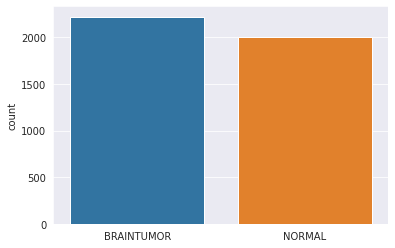

In [ ]:
#Menampilkan jumlah dataset dalam bentuk diagram batang
l = []
for i in train:
    if(i[1] == 0):
        l.append("BRAINTUMOR")
    else:
        l.append("NORMAL")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

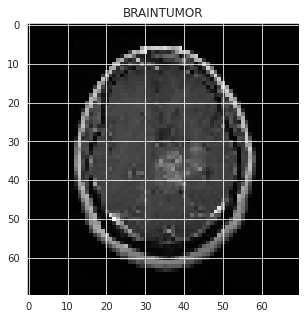

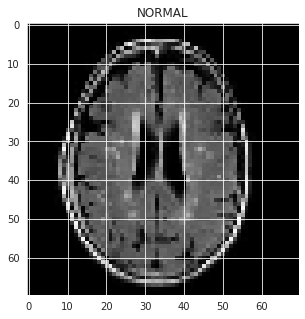

In [ ]:
#Menamilkan sampel data masing-masing kelas
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
#Menginisialisasi feature dan label dalam variabel array
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [ ]:
#Normalisasi data atau merubah citra RGB menjadi citra biner
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [ ]:
#Me-resize citra (memperkecil data) menjadi 70x70
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [ ]:
# Augmentasi data untuk mencegah overfitting data
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False, 
        zca_whitening=False, 
        rotation_range = 30, 
        zoom_range = 0.2,
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip = False,
        vertical_flip=False)

datagen.fit(x_train)

In [ ]:
#Rancangan layer CNN
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (70,70,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         7

In [ ]:
#Menampilkan nilai akurasi dan loss berdasarkan history training
history = model.fit(datagen.flow(x_train,y_train, batch_size = 50) ,epochs = 35 , validation_data = datagen.flow(x_val, y_val))

Epoch 1/35
85/85 [==============================] - 58s 477ms/step - loss: 0.6856 - accuracy: 0.5371 - val_loss: 0.6439 - val_accuracy: 0.6075
Epoch 2/35
85/85 [==============================] - 41s 484ms/step - loss: 0.6089 - accuracy: 0.6642 - val_loss: 0.6083 - val_accuracy: 0.6525
Epoch 3/35
85/85 [==============================] - 39s 464ms/step - loss: 0.5451 - accuracy: 0.7151 - val_loss: 0.6231 - val_accuracy: 0.6575
Epoch 4/35
85/85 [==============================] - 39s 463ms/step - loss: 0.4960 - accuracy: 0.7562 - val_loss: 0.5919 - val_accuracy: 0.7150
Epoch 5/35
85/85 [==============================] - 41s 484ms/step - loss: 0.4646 - accuracy: 0.7795 - val_loss: 0.5575 - val_accuracy: 0.7025
Epoch 6/35
85/85 [==============================] - 40s 471ms/step - loss: 0.4170 - accuracy: 0.8026 - val_loss: 0.5541 - val_accuracy: 0.7125
Epoch 7/35
85/85 [==============================] - 41s 488ms/step - loss: 0.4033 - accuracy: 0.8211 - val_loss: 0.5674 - val_accuracy: 0.7450

In [ ]:
print("Loss of the model is - " , model.evaluate(x_train,y_train)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_train,y_train)[1]*100 , "%")

133/133 [==============================] - 9s 65ms/step - loss: 0.0806 - accuracy: 0.9700
Loss of the model is -  8.058464527130127 %
133/133 [==============================] - 9s 65ms/step - loss: 0.0806 - accuracy: 0.9700
Accuracy of the model is -  96.99550271034241 %


In [ ]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

6/6 [==============================] - 0s 57ms/step - loss: 0.0377 - accuracy: 0.9827
Loss of the model is -  3.7671994417905807 %
6/6 [==============================] - 0s 57ms/step - loss: 0.0377 - accuracy: 0.9827
Accuracy of the model is -  98.26589822769165 %


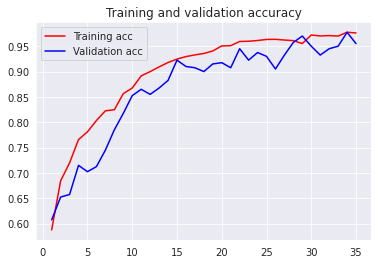

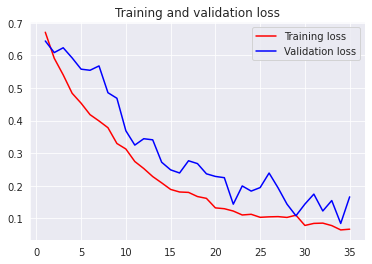

In [ ]:
#Grafik Accuracy dan Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:5]

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['BRAINTUMOR','NORMAL']))

              precision    recall  f1-score   support

  BRAINTUMOR       0.97      1.00      0.98        91
      NORMAL       1.00      0.96      0.98        82

    accuracy                           0.98       173
   macro avg       0.98      0.98      0.98       173
weighted avg       0.98      0.98      0.98       173



In [ ]:
cm = confusion_matrix(y_test,predictions)
cm

array([[91,  0],
       [ 3, 79]])

In [ ]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

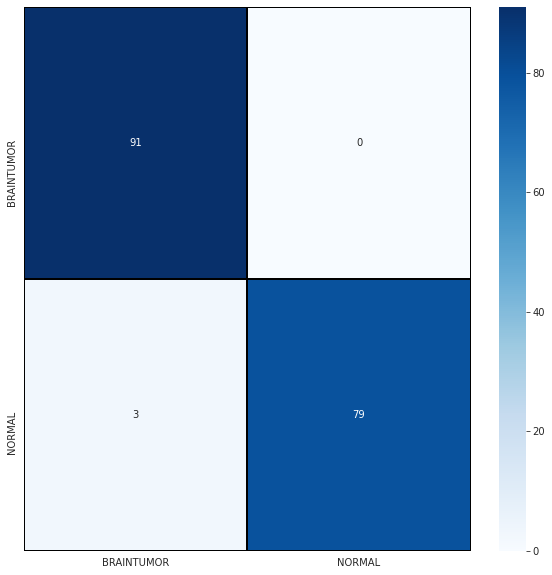

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

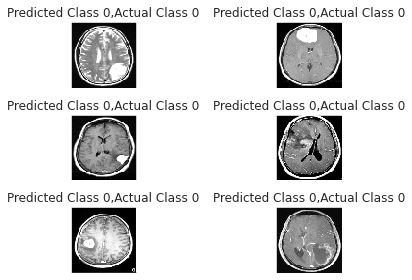

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(70,70), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

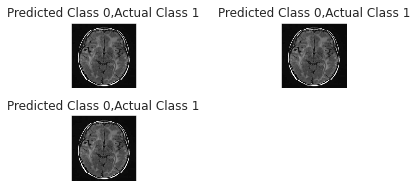

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(70,70), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1